In [130]:
# import libraries
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.ticker as mticker
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
import pandas as pd
import hvplot.xarray
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

In [2]:
# problem 1
# load data
data = pd.read_csv('usgs_earthquakes.csv')
#check data
data 

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [3]:
# find the top 50 earthquakes
top50 = data.sort_values('mag',ascending=False)[0:50]

# check the result
top50

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
33537,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
95913,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
31850,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
34318,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake
106285,2014-11-15 02:31:41.720,1.8929,126.5217,45.00,7.1,mww,NaN,18.0,1.39700,0.71,us,usc000sxh8,2015-03-20T18:42:02.735Z,"154km NW of Kota Ternate, Indonesia",earthquake


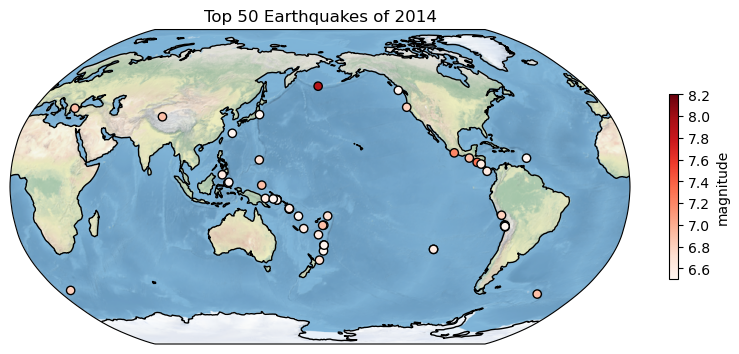

In [4]:
# plot the map
fig = plt.figure(figsize=(10,8))

# Create an axes with  robinson projection style
proj = ccrs.Robinson(central_longitude=180)
ax = plt.axes(projection=proj)

# Create plot coastlines and the world map, the world map was taught by MinQiLiu
ax.coastlines()
ax.stock_img()

# plot the title
plt.title("Top 50 Earthquakes of 2014")

# Scatter plot
plt.scatter('longitude', 'latitude', data=top50, c='mag',cmap='Reds', edgecolors='black', linewidths=1,zorder=10,transform=ccrs.PlateCarree())

# plot the color bar
plt.colorbar(ax=ax,shrink = 0.3,ticks=[6.6,6.8,7.0,7.2,7.4,7.6,7.8,8.0,8.2],label='magnitude')


In [20]:
# problem2

In [87]:
# import the data
data = xr.open_dataset('sst.mnmean.v4.nc',engine='netcdf4')
# check the result
data

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 1994, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-02-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/30)
    history:                 created 10/2014 by CAS using NCDC's ERSST V4 asc...
    title:                   NOAA Extended Reconstructed Sea Surface Temperat...
    climatology:             Climatology is based on 1971-2000 SST, Xue, Y., ...
    description:             In situ data: ICOADS2.5 before 2007 and NCEP in ...
    citation:                Huang et al, 2014: Extended Reconstructed Sea Su...
    comment:                 SSTs were observed by conventional thermometers ...
    ...                      ...
    license:                 No constraints on data access or use
    original_publisher_url:  http://www.ncdc.noaa.gov
    dataset_title:           Extended Reconstructed Sea Surface Temperature (...
    Source:                  http://www.ncdc.noaa.gov/data-access/marineocean...
    data_modified:           2020-03-03
    References:              http://www.psl.noaa.gov/data/gridded/data.noaa.e...

In [88]:
# choose data 0f 2019
data = data.sel(time=slice('2019-01-01','2019-12-01'))
#check the result
data

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 12, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 2019-01-01 2019-02-01 ... 2019-12-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/30)
    history:                 created 10/2014 by CAS using NCDC's ERSST V4 asc...
    title:                   NOAA Extended Reconstructed Sea Surface Temperat...
    climatology:             Climatology is based on 1971-2000 SST, Xue, Y., ...
    description:             In situ data: ICOADS2.5 before 2007 and NCEP in ...
    citation:                Huang et al, 2014: Extended Reconstructed Sea Su...
    comment:                 SSTs were observed by conventional thermometers ...
    ...                      ...
    license:                 No constraints on data access or use
    original_publisher_url:  http://www.ncdc.noaa.gov
    dataset_title:           Extended Reconstructed Sea Surface Temperature (...
    Source:                  http://www.ncdc.noaa.gov/data-access/marineocean...
    data_modified:           2020-03-03
    References:              http://www.psl.noaa.gov/data/gridded/data.noaa.e...

In [89]:
# mean by the time 
data = data.mean(dim='time')
# check the result
data

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (nbnds) float64 8.015e+04 8.018e+04
    sst        (lat, lon) float32 -1.8 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan

Text(110, 13.5, 'south China sea')

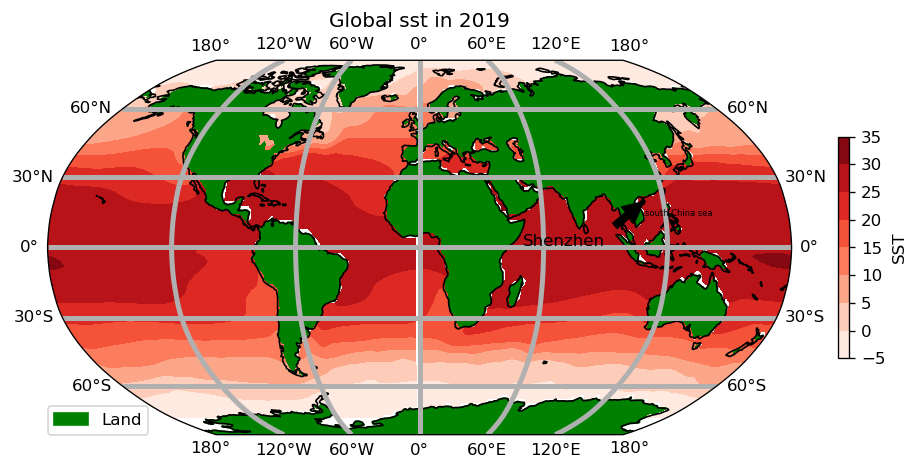

In [201]:
#global
# create the figure and projection
plt.figure(figsize=(10,8),dpi=120)
ax = plt.axes(projection=ccrs.Robinson())

# add features
ax.coastlines()
ax.add_feature(cfeature.LAND, edgecolor='green', facecolor='green', zorder=0)

# plot the sst 
plt.contourf(data.lon, data.lat, data.sst, cmap='Reds',transform=ccrs.PlateCarree())

# add title
plt.title('Global sst in 2019')

# add colorbar
plt.colorbar(shrink = 0.3,label='SST')

# add grid line and ticks
ax.gridlines(draw_labels=True,linewidth = 3)

# add legend , i am inspired by reading csdn
land = mpatches.Patch(color='Green', label='Land')
plt.legend(handles=[land],loc=[0,0])

# add annotation
plt.annotate('Shenzhen', xy=(114, 22), xytext=(50, 0.5), arrowprops=dict(facecolor='black', shrink=0.15), transform=ccrs.PlateCarree())

# add text box
plt.text(110, 13.5, 'south China sea', fontsize=5, bbox=dict(facecolor='yellow', alpha=0, edgecolor='black'), transform=ccrs.PlateCarree())

